# 实测数据预处理以及画图

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('p2data.xlsx', sheet_name=1)
df1 = pd.read_excel('Problem2_multi.xlsx')
df.head()

,time,pos,SO2,NO2,PM10,PM2.5,O3,CO,T,H,P,WS,WD,AQI,MainPStr,DAQI,MainP
0,2019-04-16 00:00:00,监测点A,5.0,75.0,61.0,38.0,1.0,1.0,21.1,89,1013,1.2,346.5,94.0,NO2,-14.0,1
1,2019-04-16 01:00:00,监测点A,5.0,64.0,60.0,41.0,25.0,0.8,20.4,92,1012.4,1.1,18,80.0,NO2,-5.0,1
2,2019-04-16 02:00:00,监测点A,4.0,60.0,36.0,40.0,25.0,0.8,20,93,1011.3,1.1,65.9,75.0,NO2,-26.0,1
3,2019-04-16 03:00:00,监测点A,4.0,39.0,35.0,33.0,41.0,0.7,19.8,93,1010.4,1.5,78.4,49.0,NO2,6.0,1
4,2019-04-16 04:00:00,监测点A,4.0,39.0,28.0,39.0,36.0,0.8,19.9,92,1010,1.5,73.5,55.0,PM2.5,0.0,3


In [3]:
df1.head()

,V1,SO2,NO2,PM10,PM2.5,O3,CO,T,H,P,...,ZWS,ZWD,ZAQI,ZSO2,ZNO2,ZPM10,ZPM2.5,ZO3,ZCO,AP
0,0,5.0,75.0,61.0,38.0,1.0,1.0,21.1,89.0,1013.0,...,-0.269612,1.630232,1.174719,-0.539425,1.761039,0.615781,0.780853,-1.046114,1.187687,0.602568
1,1,5.0,64.0,60.0,41.0,25.0,0.8,20.4,92.0,1012.4,...,-0.418412,-1.159781,0.730466,-0.539425,1.301630,0.579315,0.943898,-0.575400,0.347063,0.510956
2,2,4.0,60.0,36.0,40.0,25.0,0.8,20.0,93.0,1011.3,...,-0.418412,-0.752958,0.571804,-0.809740,1.134572,-0.295866,0.889550,-0.575400,0.347063,0.240218
3,3,4.0,39.0,35.0,33.0,41.0,0.7,19.8,93.0,1010.4,...,0.176791,-0.646793,-0.253237,-0.809740,0.257517,-0.332332,0.509110,-0.261591,-0.073249,-0.039965
4,4,4.0,39.0,28.0,39.0,36.0,0.8,19.9,92.0,1010.0,...,0.176791,-0.688409,-0.062843,-0.809740,0.257517,-0.587593,0.835201,-0.359656,0.347063,-0.023448


In [4]:
df.drop(columns=['time', 'pos'],inplace=True)

In [5]:
df.dropna(axis=0, how='any', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19377 entries, 0 to 19430
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SO2       19377 non-null  float64
 1   NO2       19377 non-null  float64
 2   PM10      19377 non-null  float64
 3   PM2.5     19377 non-null  float64
 4   O3        19377 non-null  float64
 5   CO        19377 non-null  float64
 6   T         19377 non-null  object 
 7   H         19377 non-null  object 
 8   P         19377 non-null  object 
 9   WS        19377 non-null  object 
 10  WD        19377 non-null  object 
 11  AQI       19377 non-null  float64
 12  MainPStr  19377 non-null  object 
 13  DAQI      19377 non-null  float64
 14  MainP     19377 non-null  object 
dtypes: float64(8), object(7)
memory usage: 2.4+ MB


In [7]:
df.head()

,SO2,NO2,PM10,PM2.5,O3,CO,T,H,P,WS,WD,AQI,MainPStr,DAQI,MainP
0,5.0,75.0,61.0,38.0,1.0,1.0,21.1,89,1013,1.2,346.5,94.0,NO2,-14.0,1
1,5.0,64.0,60.0,41.0,25.0,0.8,20.4,92,1012.4,1.1,18,80.0,NO2,-5.0,1
2,4.0,60.0,36.0,40.0,25.0,0.8,20,93,1011.3,1.1,65.9,75.0,NO2,-26.0,1
3,4.0,39.0,35.0,33.0,41.0,0.7,19.8,93,1010.4,1.5,78.4,49.0,NO2,6.0,1
4,4.0,39.0,28.0,39.0,36.0,0.8,19.9,92,1010,1.5,73.5,55.0,PM2.5,0.0,3


In [8]:
df[['T','H','P','WS','WD']] = df[['T','H','P','WS','WD']].astype('float')

In [9]:
df['AP'] = df1['AP']

In [10]:
df.to_csv('实测数据预处理.csv')

Text(0.5, 0, '$\\rm{T}^\\circ\\rm{C}$')

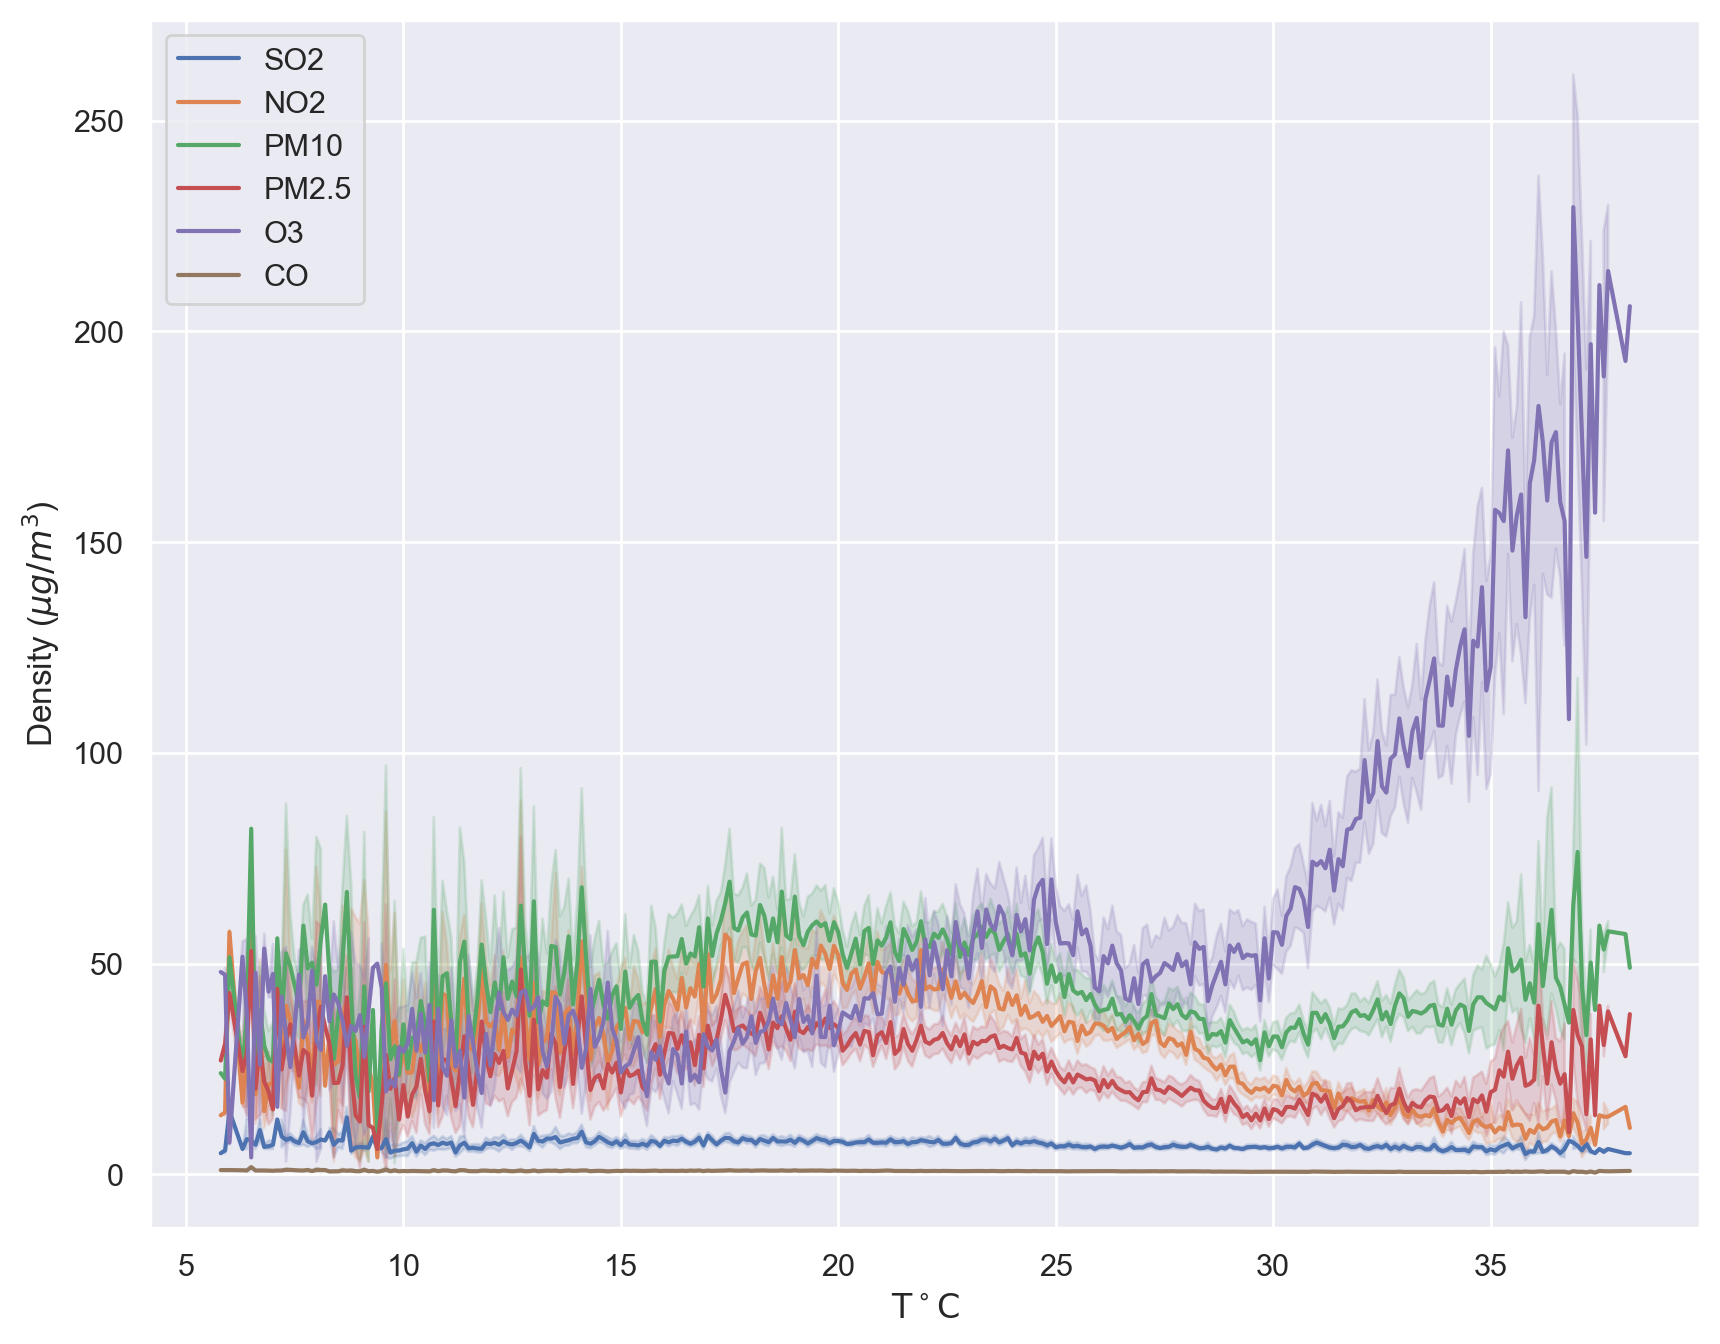

In [11]:
plt.figure(figsize=(10,8), dpi=200)
sns.lineplot(data=df, x='T', y='SO2',label='SO2')
sns.lineplot(data=df, x='T', y='NO2',label='NO2')
sns.lineplot(data=df, x='T', y='PM10',label='PM10')
sns.lineplot(data=df, x='T', y='PM2.5',label='PM2.5')
sns.lineplot(data=df, x='T', y='O3',label='O3')
sns.lineplot(data=df, x='T', y='CO',label='CO')
plt.ylabel(r'Density ($\mu g/m^3$)')
plt.xlabel(r'$\rm{T}^\circ\rm{C}$')

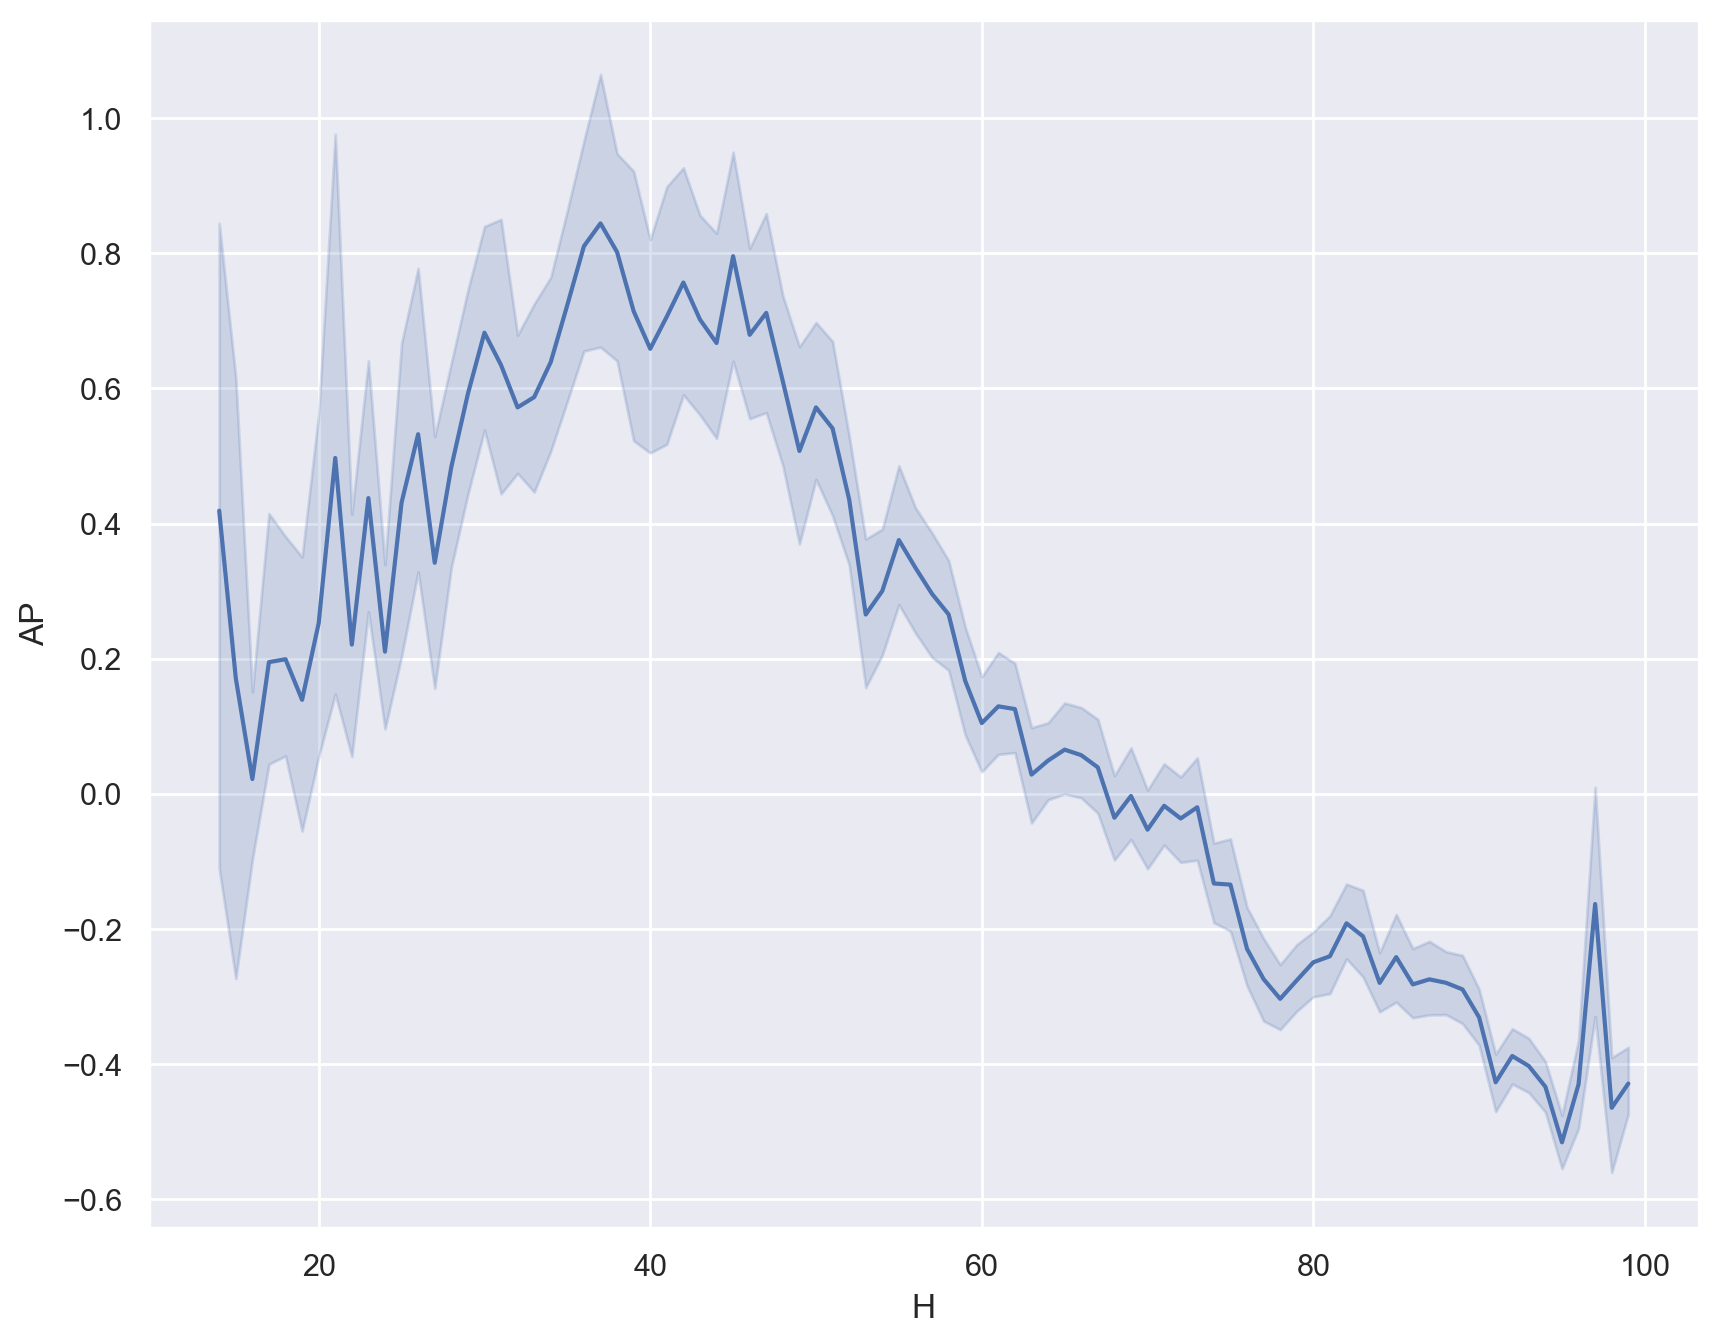

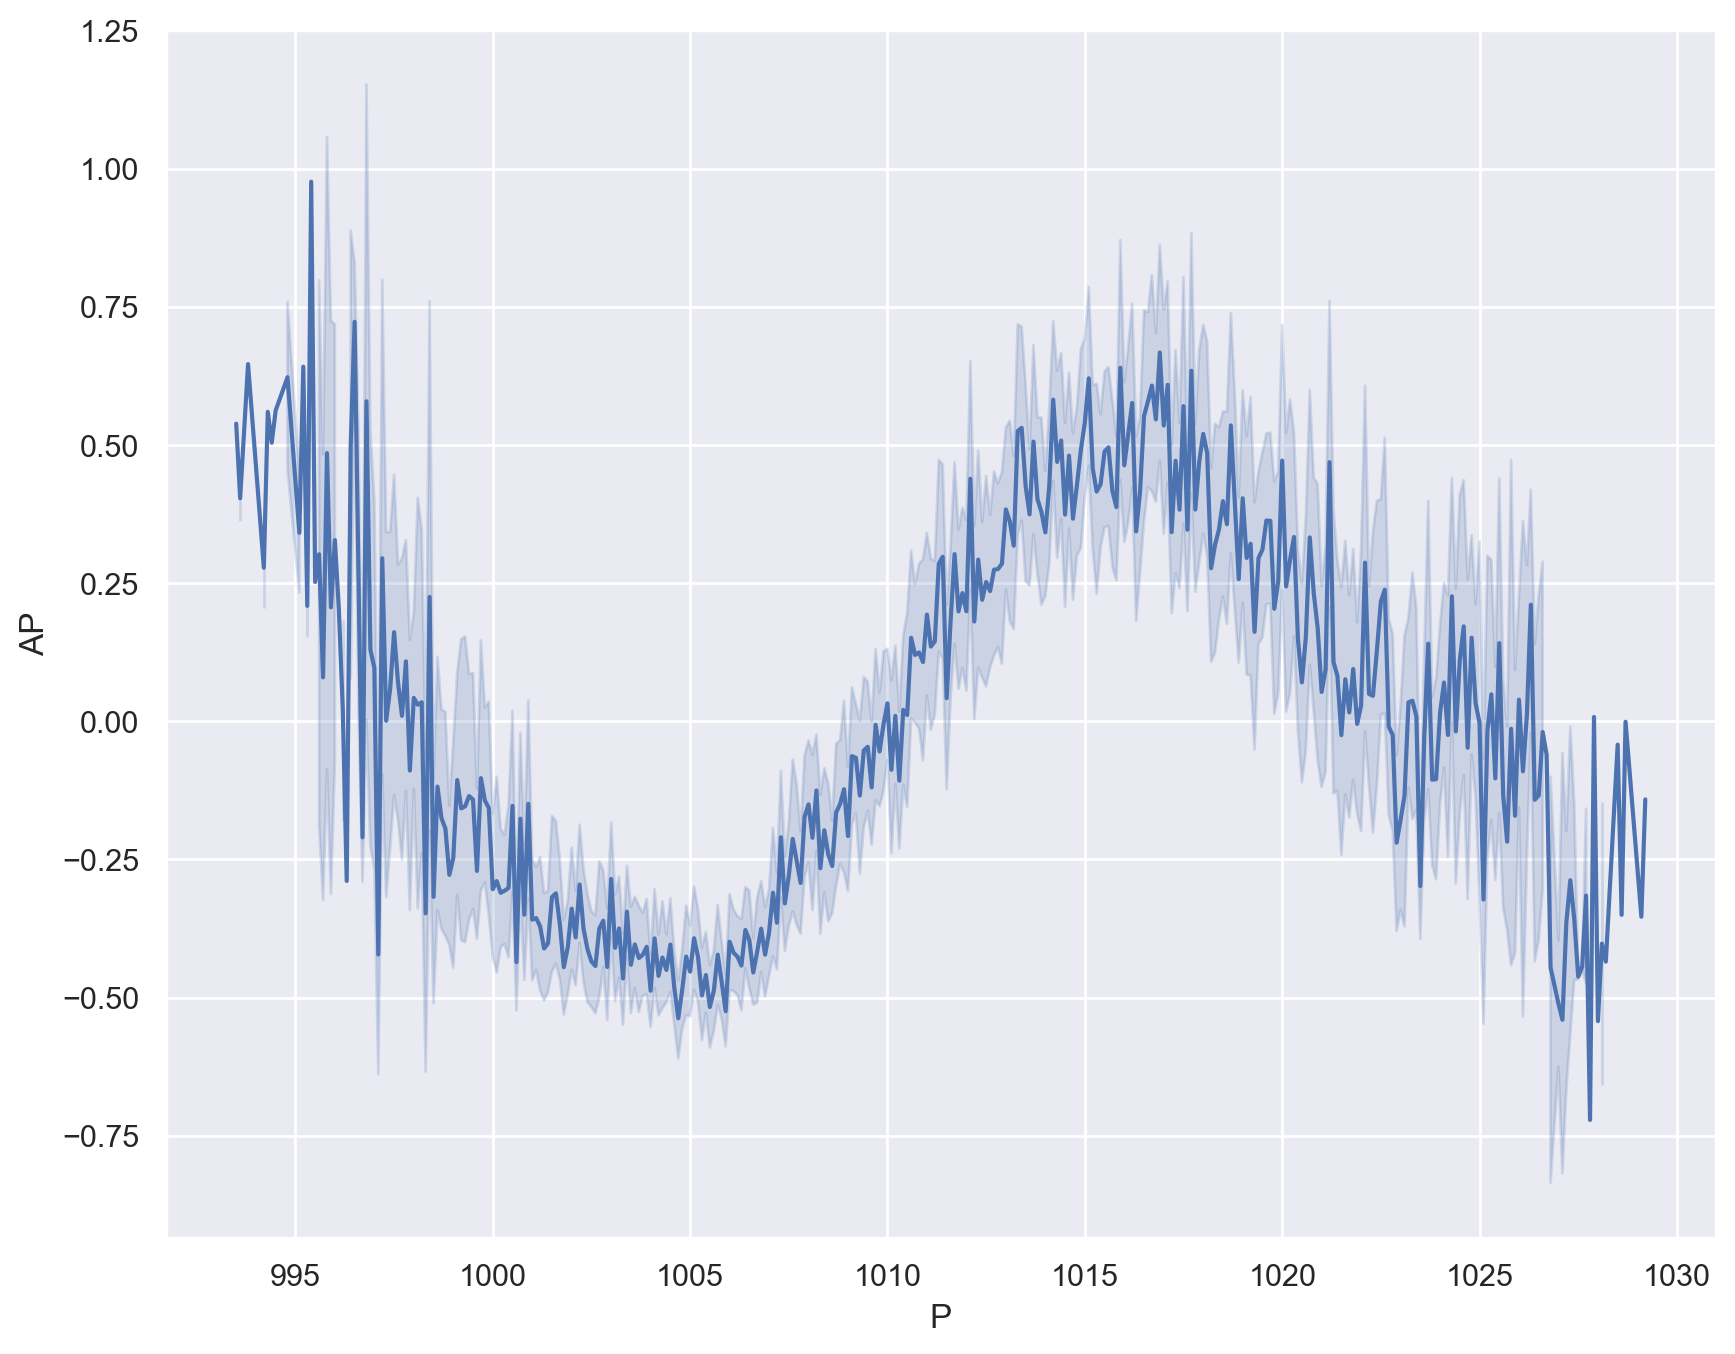

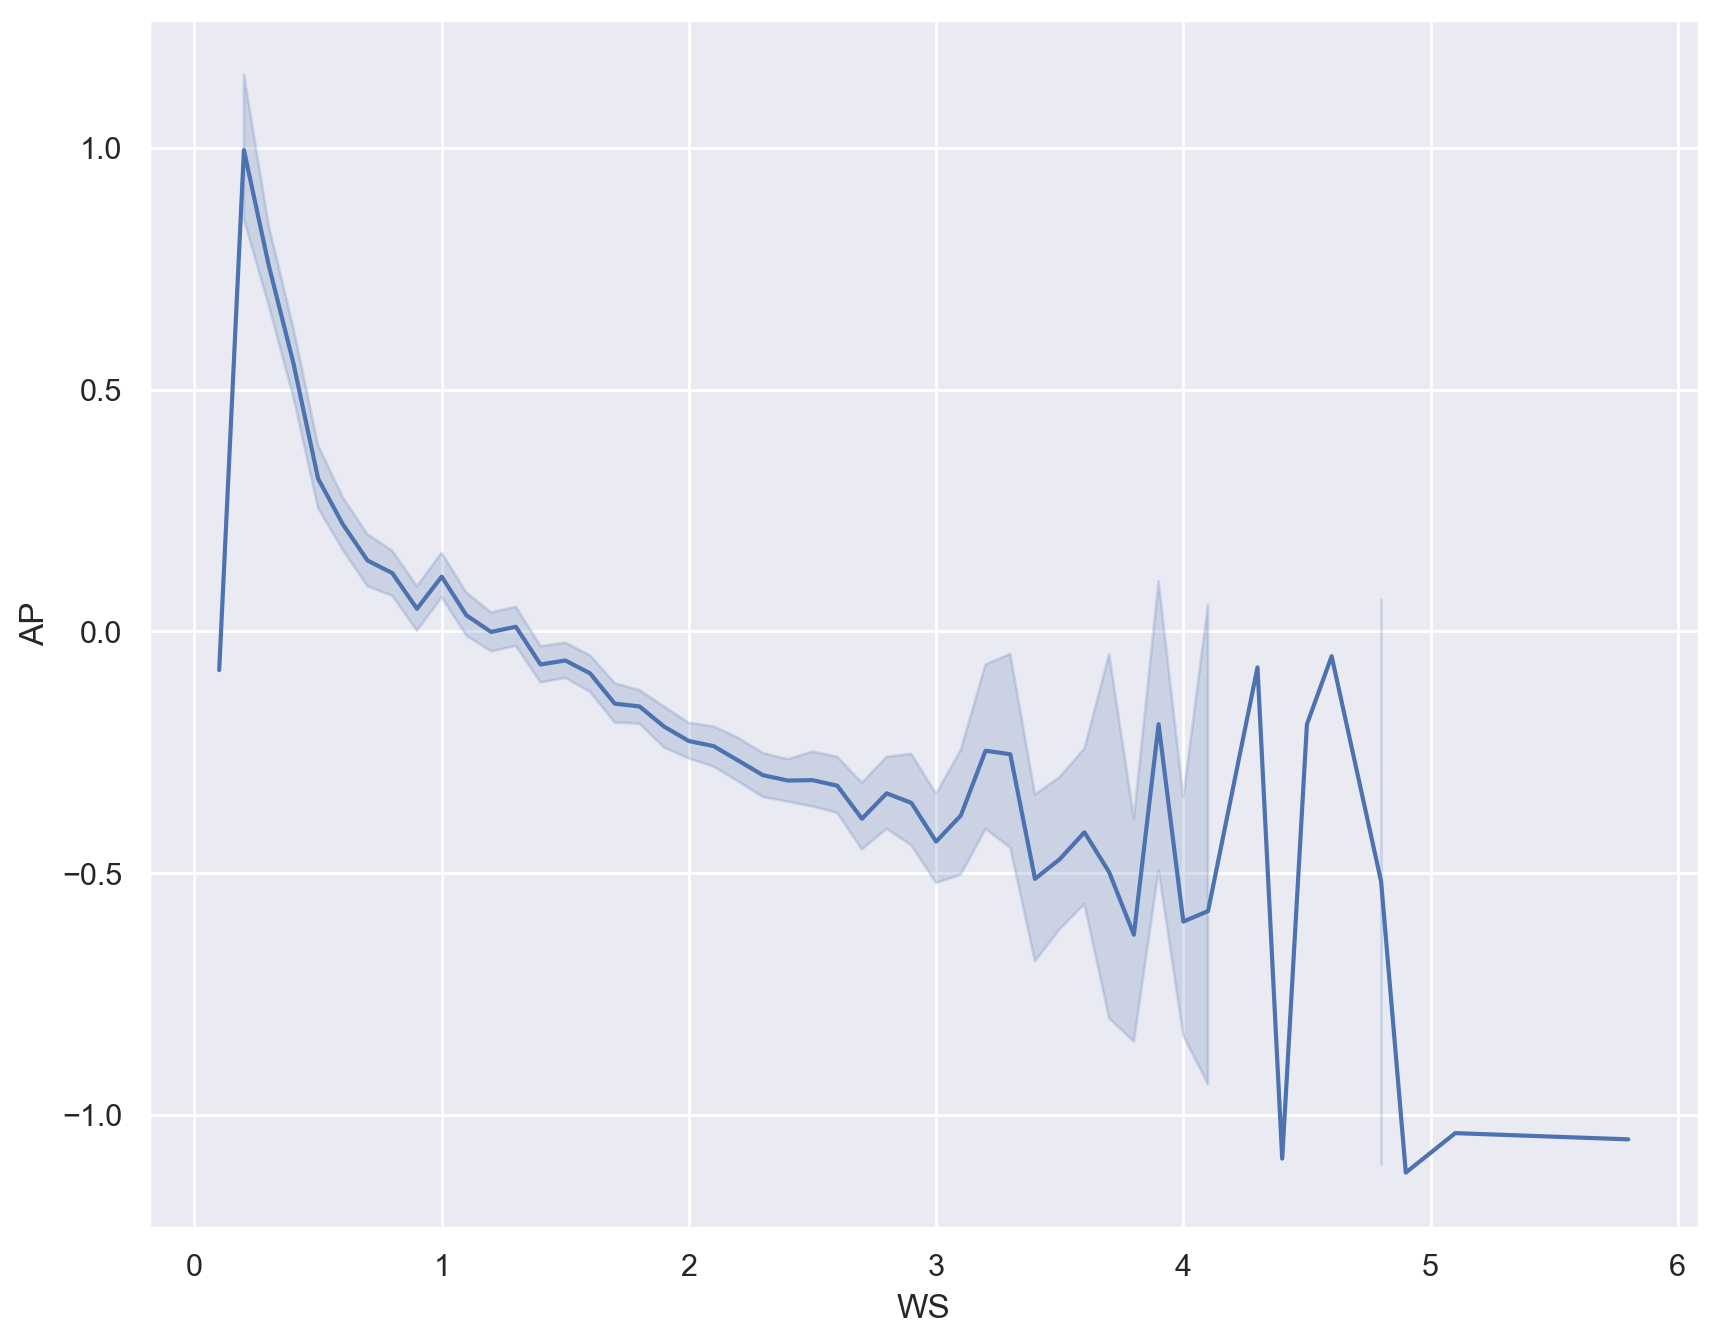

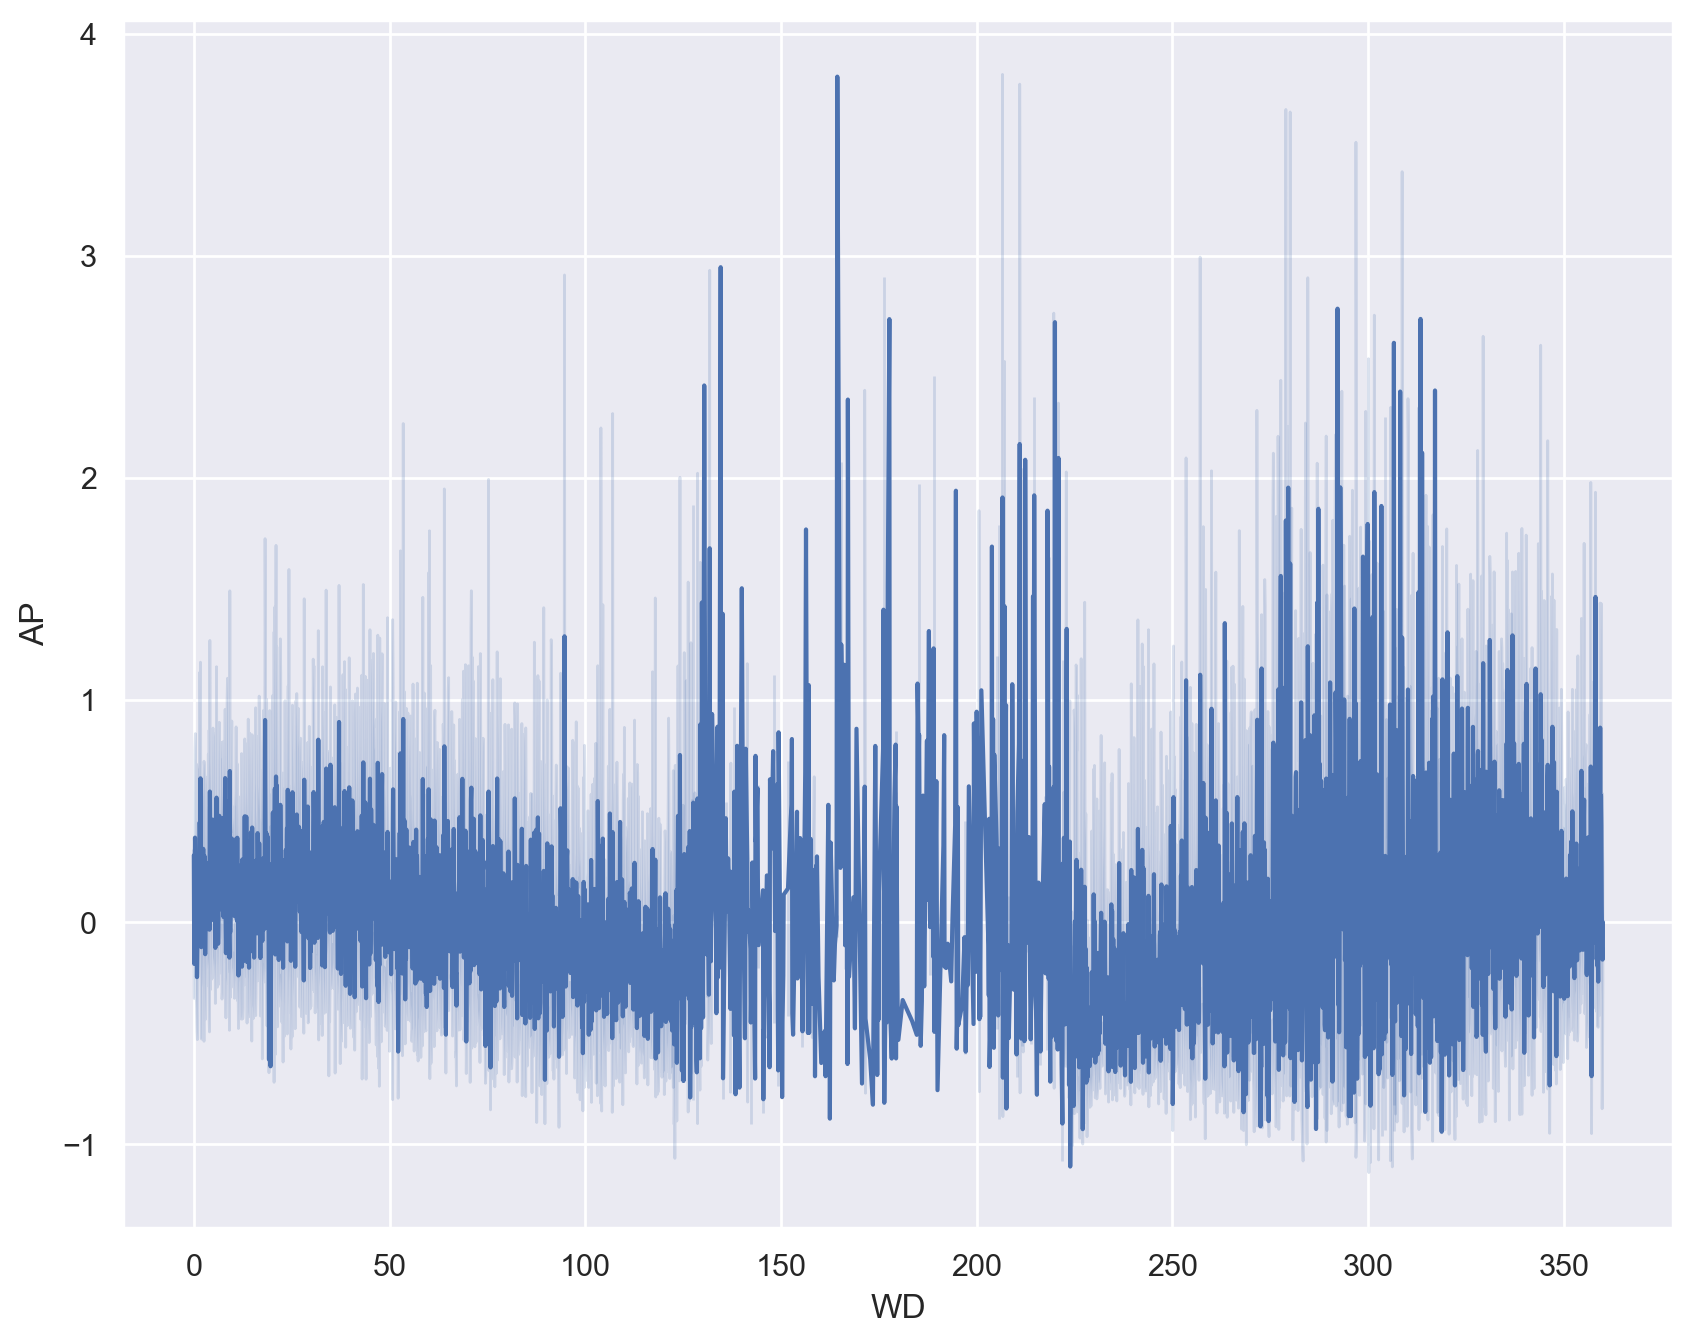

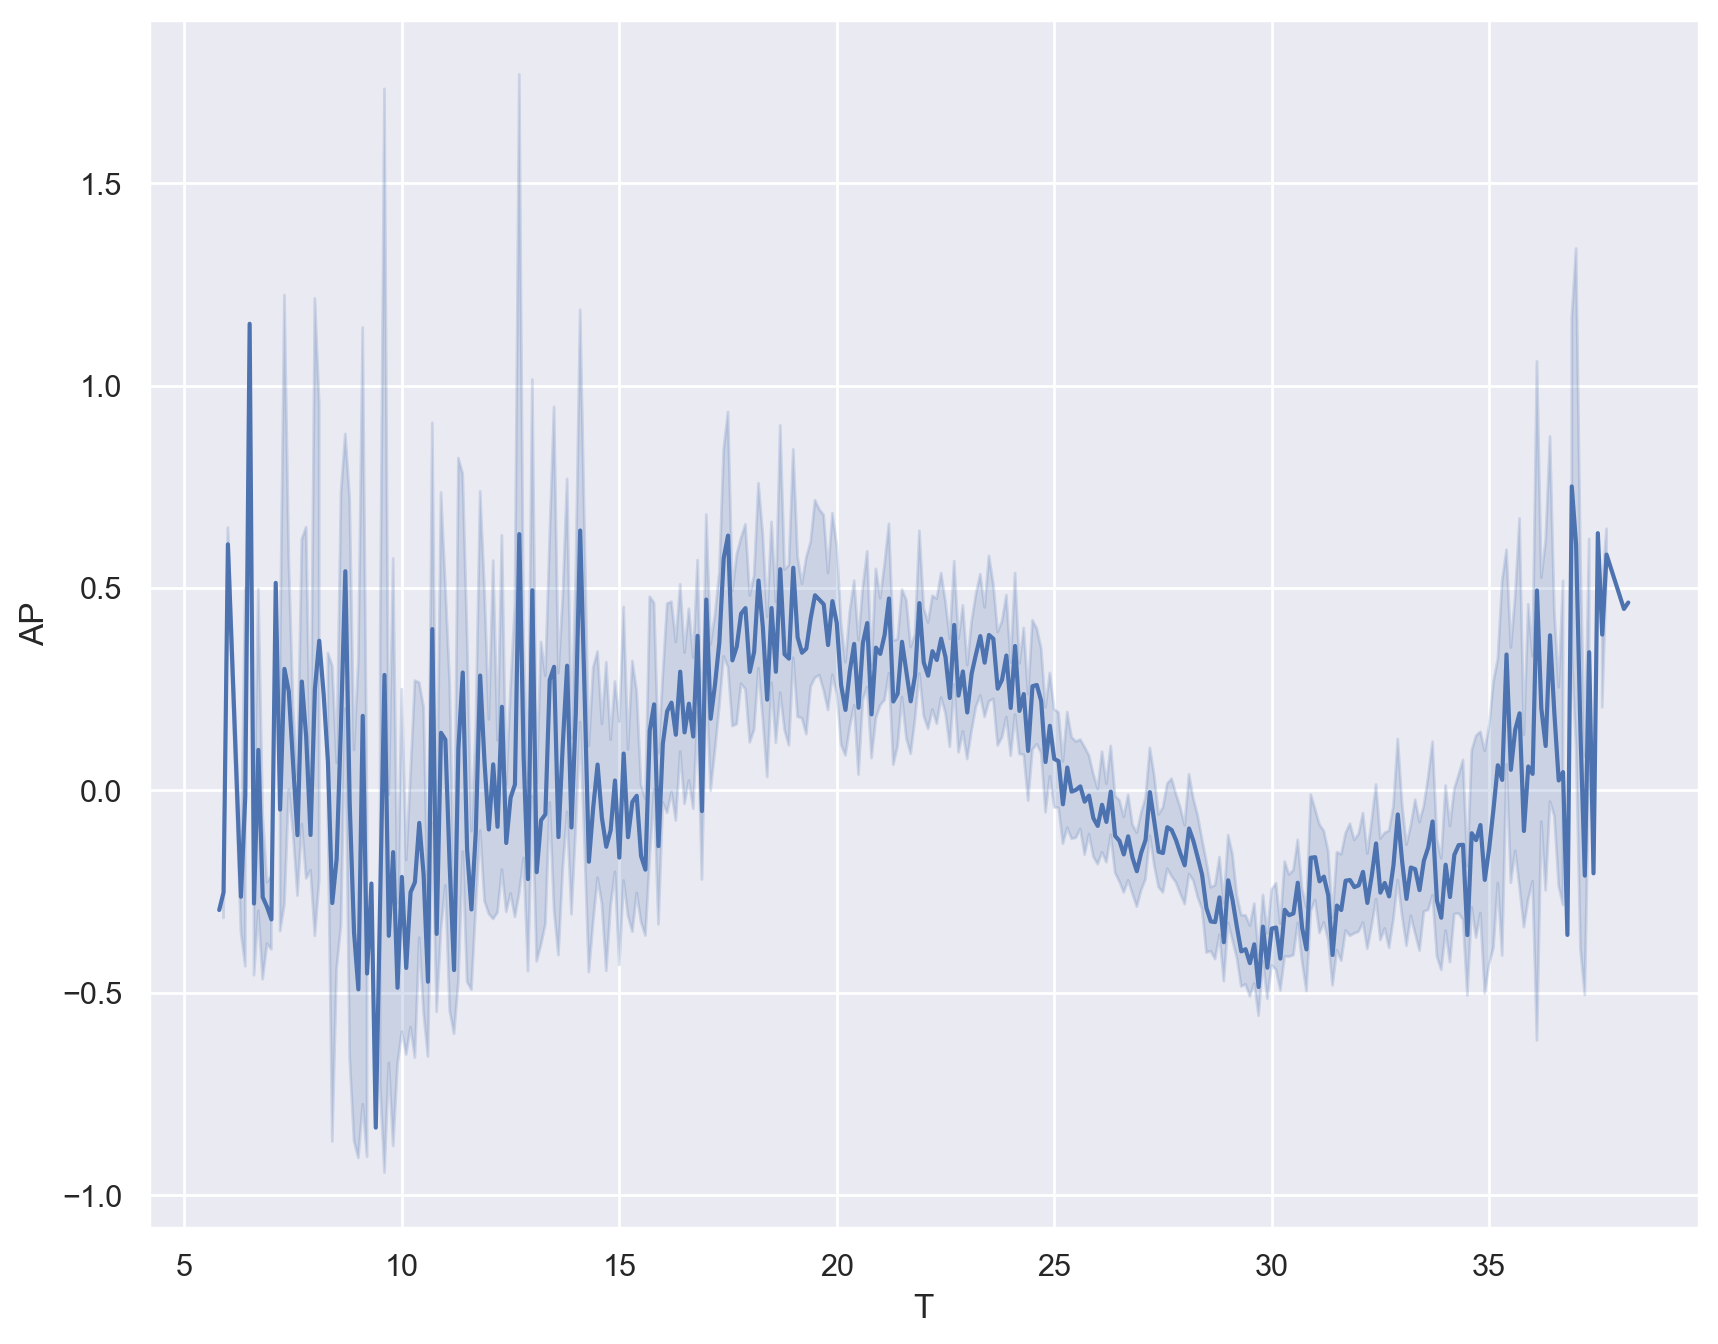

In [14]:
para = ['H','P','WS','WD','T']
for i in range(0,5):
    plt.figure(figsize=(10,8), dpi=200)
    sns.lineplot(data=df, y='AP', x=para[i])
    plt.xlabel(para[i])
    plt.ylabel('AP')
    plt.savefig(str(para[i]) + '-' + 'AP' + '.png', dpi=200)